# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612, CS 652, CS/IT 308 Machine Learning </center>
## <center> Lab#2 Bayes' classifier,k-means and k-NN</center>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Bayesian decision rule under normality assumption
Hint: use classnote for same

### Consider the following data:
Here, second column represent the class

In [6]:
dataset = np.array([[3.39,0],[3.58,0],[2.28,0],[7.42,1],[5.74,1],[9.17,1],[7.79,1],[7.93,1],[1.34,0],[3.11,0]])
print('Feature|Classe')
print(dataset)

Feature|Classe
[[3.39 0.  ]
 [3.58 0.  ]
 [2.28 0.  ]
 [7.42 1.  ]
 [5.74 1.  ]
 [9.17 1.  ]
 [7.79 1.  ]
 [7.93 1.  ]
 [1.34 0.  ]
 [3.11 0.  ]]


### Find class probability $P_1$ and $P_2$

In [7]:
#write code here
count0=0
count1=0
total=(dataset.shape[0])
for i in range(0,10):
    if(dataset[i,1]==0):
        count0+=1
    else:
        count1+=1
P1=count0/total#num of times class 0 in data set
P2=count1/total#num of times class 1 in data set
print("class probability of P1:",P1)
print("class probability of P2:",P2)

class probability of P1: 0.5
class probability of P2: 0.5


### Find sample mean and sample standard deviation for each class 

In [8]:
mean1=0
mean0=0
sd1=0
sd0=0
for i in range(0,total):
    if(dataset[i,1]==0):
        mean0+=dataset[i,0]
    else:
        mean1+=dataset[i,0]
mean1=mean1/(total/2)
mean0=mean0/(total/2)
for i in range(0,total):
    if(dataset[i,1]==0):
        sd0+=np.power(dataset[i,0]-mean0,2)
    else:
        sd1+=np.power(dataset[i,0]-mean1,2)
sd1=np.sqrt(sd1/(total/2))
sd0=np.sqrt(sd0/(total/2))
print("mean and sd for class 0:",mean0,sd0)
print("mean and sd for class 1:",mean1,sd1)

mean and sd for class 0: 2.7399999999999998 0.8290476463991681
mean and sd for class 1: 7.609999999999999 1.1046628444914763


### Plot $p_1(x)$ and $p_2(x)$

In [9]:
# Calculate the Gaussian probability distribution function for x
import math
def calculate_probability(x, mean, stdev):
    p=(1/(stdev*(np.sqrt(2*math.pi))))*(np.exp((-1/2)*(np.power((x-mean)/stdev,2))))
    return p

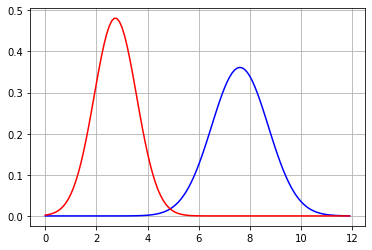

In [10]:
x  = np.array([3.39,3.58,2.28,1.34,3.11])
y=np.array([7.42,5.74,9.17,7.79,7.93])
k=np.arange(0,12,0.1)
plt.plot(k,calculate_probability(k,mean1,sd1),'b')
plt.plot(k,calculate_probability(k,mean0,sd0),'r')
plt.grid()

### Test for $x=3$  and $x=5$

In [11]:
if(calculate_probability(3, mean0, sd0)>calculate_probability(3, mean1, sd1)):
    print("class 0")
else:
    print("class 1")

class 0


In [12]:
def ans(x):
    if(calculate_probability(x, mean0, sd0)>calculate_probability(x, mean1, sd1)):
        print("class 0")
    else:
        print("class 1")
ans(3)
ans(5)

class 0
class 1


## Homework:
1. Try for this 2-D data using classnote
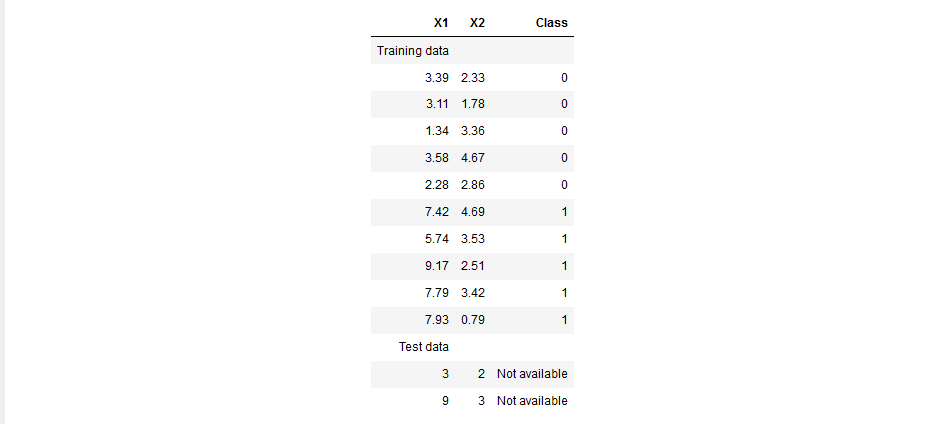
2. Implement Bayesian classifier for iris data.
You can get help from following link. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

In [13]:
#write code here
dataset0=np.array([[3.39,2.33],[3.11,1.78],[1.34,3.36],[3.58,4.67],[2.28,2.86]])
dataset1=np.array([[7.42,4.69],[5.74,3.53],[9.17,2.51],[7.79,3.42],[7.93,0.79]])
mean00=np.sum(dataset0[:,0])/5
mean01=np.sum(dataset0[:,1])/5
mean10=np.sum(dataset1[:,0])/5
mean11=np.sum(dataset1[:,1])/5
def stdev(x,mean):
    s=np.sqrt(np.sum(np.power(x-mean,2)/x.shape))
    return s
stdev00=stdev(dataset0[:,0],mean00)
stdev01=stdev(dataset0[:,1],mean01)
stdev10=stdev(dataset1[:,0],mean10)
stdev11=stdev(dataset1[:,1],mean11)
if(calculate_probability(3, mean00, stdev00)*calculate_probability(2, mean01, stdev01)>calculate_probability(3, mean10, stdev10)*calculate_probability(2, mean11, stdev11)):
    print("class 0")
else:
    print("class 1")



class 0


## 2. K-Nearest neighbour (KNN)

Consider the following observations:
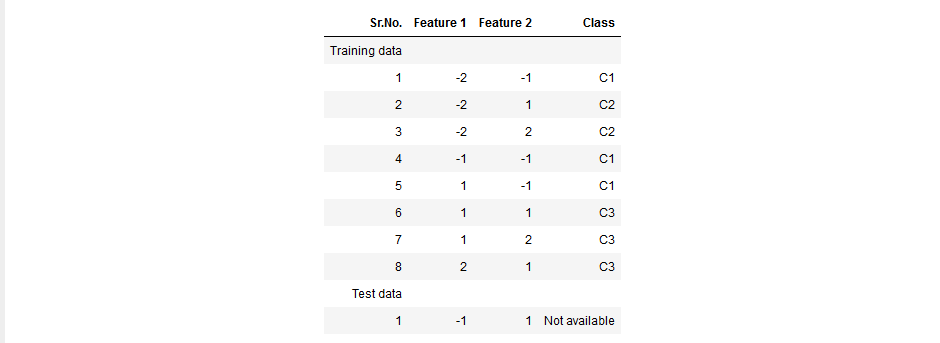

Use KNN technique to classify the test data using K=3.

Hint: 
<br>
1) Calculate the Euclidean distance between the new point and the existing points.
<br>
2) Sort out the points distance-wise.
<br>
3) Now select the k-neighbours. 

In [14]:
data = np.float32([[-2,-1,1],[-2,1,2],[-2,2,2],[-1,-1,1],[1,-1,1],[1,1,3],[1,2,3],[2,1,3]])
print('Feature1|Feature2|Class')
print(data)

Feature1|Feature2|Class
[[-2. -1.  1.]
 [-2.  1.  2.]
 [-2.  2.  2.]
 [-1. -1.  1.]
 [ 1. -1.  1.]
 [ 1.  1.  3.]
 [ 1.  2.  3.]
 [ 2.  1.  3.]]


In [15]:
x=np.float32([1,-1])
dataset=data[0:,0:2]
#print(dataset)
d=dataset-x
dd=np.power(d,2)
#one=np.array([[1],[1]])
#print(np.dot(dd,np.array[[1],[1]]))
distance=np.sqrt(np.sum(dd, axis=1))
#for i in range(0,8):
#    distance[i]=np.sum(dd,axis=i)
distance=distance.reshape(8,1)
#print(distance)
ans=np.append(data,distance,axis=1)
print(ans[np.argsort(ans[:,3])])


[[ 1.        -1.         1.         0.       ]
 [-1.        -1.         1.         2.       ]
 [ 1.         1.         3.         2.       ]
 [ 2.         1.         3.         2.236068 ]
 [-2.        -1.         1.         3.       ]
 [ 1.         2.         3.         3.       ]
 [-2.         1.         2.         3.6055512]
 [-2.         2.         2.         4.2426405]]


In [16]:

#write code here
#in nearest 3 most frequent is class 1 hence it belongs to class 1

## 3. K-Means

Ignore the class information of the training data given in problem 2 and use K-means algorithm to classify the same. Assume the initial starting classes as:  
<br>
C1={observations 1,2}
<br>
C2={observations 3,4,5}
<br>
C3={observations 6,7,8}
<br>

Now using the result find the class that would be assigned to the test data.

<br>
Hint: 

1) Find the centroid (mean) of each cluster based on the initial classes assignment given.

2) Find out the Euclidean distance between each point and each cluster centroid. 

3) Assign all the points to the closest cluster centroid.

4) Recompute centroids of newly formed clusters.

5) Stop if the new centroids are same as old centroids else repeat step 2 to 4. 

In [104]:
X = data[:,:-1]
#print(X[1])
print(X[0][0:2])
m,n = X.shape
datac1=np.mean(np.array([[-2 ,-1],[-2 ,1]]),axis=0)
datac2=np.mean(np.array([[-2 ,2],[-1 ,-1],[1 ,-1]]),axis=0)
datac3=np.mean(np.array([[1 ,1],[1 ,2],[2 ,1]]),axis=0)
#print(datac2)
centroid=np.array([datac1,datac2,datac3])
print(centroid-X[0][0:2])
print(centroid)

[-2. -1.]
[[0.         1.        ]
 [1.33333333 1.        ]
 [3.33333333 2.33333333]]
[[-2.          0.        ]
 [-0.66666667  0.        ]
 [ 1.33333333  1.33333333]]


In [106]:
c1=np.array([[-2 ,-1],[-2 ,1]])
c2=np.array([[-2 ,2],[-1 ,-1],[1 ,-1]])
c3=np.array([[1 ,1],[1 ,2],[2 ,1]])
def cal_cen(datac1,datac2,datac3):
    datac1=np.mean(c1,axis=0)
    datac2=np.mean(c2,axis=0)
    datac3=np.mean(c3,axis=0)
    centroid=np.array([datac1,datac2,datac3])
    return centroid


def dis_ec(centroid,point):
    k=10000
    distance=np.sqrt(np.sum(np.power(centroid-point,2), axis=1))
    for i in range(0,3):
        if(distance[i]<k):
            k=distance[i]
            m=i+1
    return m
print(dis_ec(centroid,X[0][0:2]))

1


In [110]:
centroid=cal_cen(datac1,datac2,datac3)
centroid_new=np.array([])

for i in range(0,10):
    if(np.array_equal(centroid,centroid_new)):
        print(X)
        print(centroid)
        break
    else:
        centroid=cal_cen(datac1,datac2,datac3)
        ans=np.zeros(8)
        c1=list()
        c2=list()
        c3=list()
        for j in range(0,8):
            ans[j]=dis_ec(centroid,X[j][0:2])
        ans=ans.reshape(8,1)
        X=np.append(X,ans,axis=1)
        X=X[np.argsort(X[:,2])]

        for b in range(0,8):
            if(X[b][2]==1):
                c1.append(X[b][:2])
            elif(X[b][2]==2):
                c2.append(X[b][:2])
            elif(X[b][2]==3):
                c3.append(X[b][:2])
        datac1=np.array(c1)
        datac2=np.array(c2)
        datac3=np.array(c3)
        centroid_new=cal_cen(datac1,datac2,datac3)

    
        
        

[[-2. -1.  1.  1.  1.  1.  1.]
 [-2.  1.  1.  1.  1.  1.  1.]
 [-2.  2.  1.  1.  1.  1.  1.]
 [-1. -1.  2.  2.  2.  2.  2.]
 [ 1. -1.  2.  2.  2.  2.  2.]
 [ 1.  1.  3.  3.  3.  3.  3.]
 [ 1.  2.  3.  3.  3.  3.  3.]
 [ 2.  1.  3.  3.  3.  3.  3.]]
[[-2.          0.66666667]
 [ 0.         -1.        ]
 [ 1.33333333  1.33333333]]


## Final answer

In [124]:
print("final clusters: \n",X[:,:3])
print(centroid)
answer=X[:,:3]
c1=list()
c2=list()
c3=list()
for b in range(0,8):
            if(X[b][2]==1):
                c1.append(answer[b][:2])
            elif(X[b][2]==2):
                c2.append(answer[b][:2])
            elif(X[b][2]==3):
                c3.append(answer[b][:2])
datac1=np.array(c1)
datac2=np.array(c2)
datac3=np.array(c3)



final clusters: 
 [[-2. -1.  1.]
 [-2.  1.  1.]
 [-2.  2.  1.]
 [-1. -1.  2.]
 [ 1. -1.  2.]
 [ 1.  1.  3.]
 [ 1.  2.  3.]
 [ 2.  1.  3.]]
[[-2.          0.66666667]
 [ 0.         -1.        ]
 [ 1.33333333  1.33333333]]


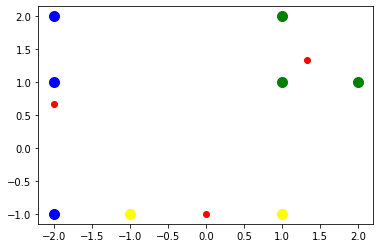

In [128]:
plt.scatter(datac1[:,0],datac1[:,1],color='blue',s=100)
plt.scatter(datac2[:,0],datac2[:,1],color='yellow',s=100)
plt.scatter(datac3[:,0],datac3[:,1],color='green',s=100)
plt.scatter(centroid[:,0],centroid[:,1],color='red')
plt.show()

# Done